In [1]:
import pandas as pd

# Load data
file_path = '../data/online_retail.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# View basic structure
df.head()


,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()


ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64

In [5]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## 🧼 Data Cleaning

- Removed missing values in critical columns (`CustomerID`, `Description`)
- Filtered out canceled orders (InvoiceNo starting with 'C')
- Calculated `TotalPrice` as `Quantity * UnitPrice`
- Converted `InvoiceDate` to datetime format



In [6]:
df = df.dropna()

In [ ]:
print(df.columns)

In [ ]:
# Check the shape and column names
print(df.shape)
print(df.columns)

# Check for missing values
df.isnull().sum()

# Drop rows with missing CustomerID or Description (optional)
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [37]:
# Total revenue
df['TotalPrice'].sum()

# Number of unique products
df['StockCode'].nunique()

# Number of customers
df['CustomerID'].nunique()


4372

## 📊 Exploratory Data Analysis

We performed initial analysis to understand customer purchasing patterns and business performance:

- **Recency Distribution** to analyze how recently customers made a purchase.
- **Top 10 Countries by Revenue** to identify best-performing markets.
- **Top-Selling Products** to discover most frequently purchased items.



<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='Description'>

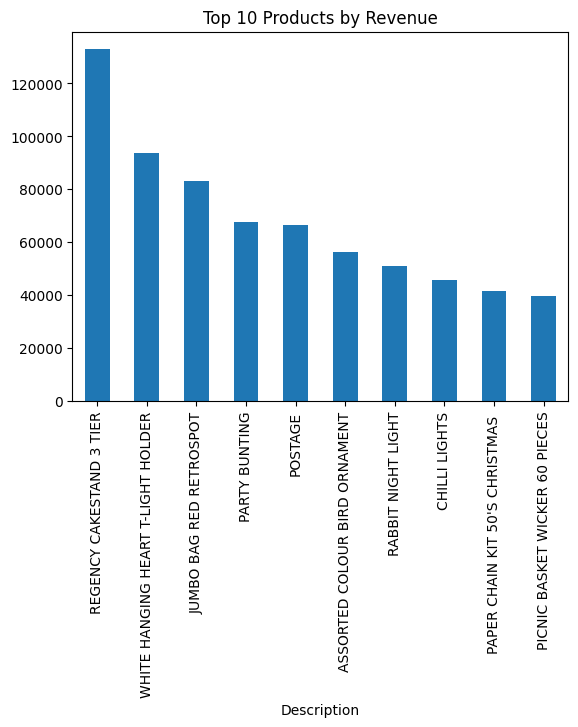

In [36]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Revenue')


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [26]:
# Create the 'plots' folder in the current notebook directory
plot_path = os.path.join(os.getcwd(), 'plots')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [27]:
plt.savefig(os.path.join(plot_path, 'recency_distribution.png'))


<Figure size 640x480 with 0 Axes>

## 📊 RFM Scoring: Segmenting Customers Based on Behavior

To segment customers, we assign scores for:
- **Recency (R)**: Days since last purchase. Lower = better.
- **Frequency (F)**: Number of unique invoices. Higher = better.
- **Monetary (M)**: Total money spent. Higher = better.

We use quantile-based binning (QCut) to divide each metric into 4 groups:
- Recency: Score 4 (most recent) to 1 (least recent)
- Frequency & Monetary: Score 1 (lowest) to 4 (highest)

These scores are combined into a single **RFM Score** (e.g., 444 = best customers).


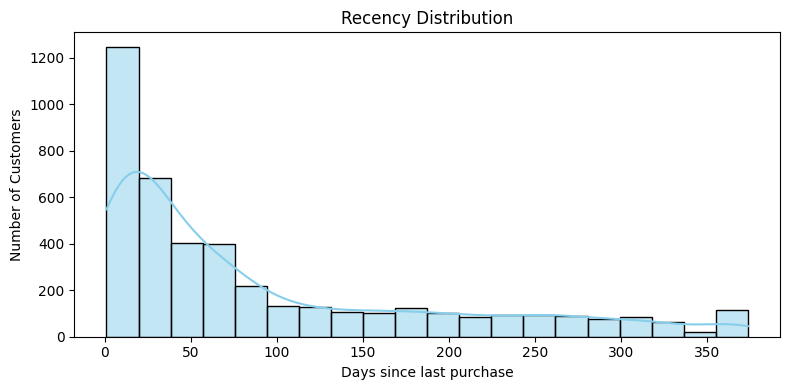

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days since last purchase')
plt.ylabel('Number of Customers')
plt.tight_layout()

# Save it to plots folder
plt.savefig(os.path.join(plot_path, 'recency_distribution.png'))
plt.show()


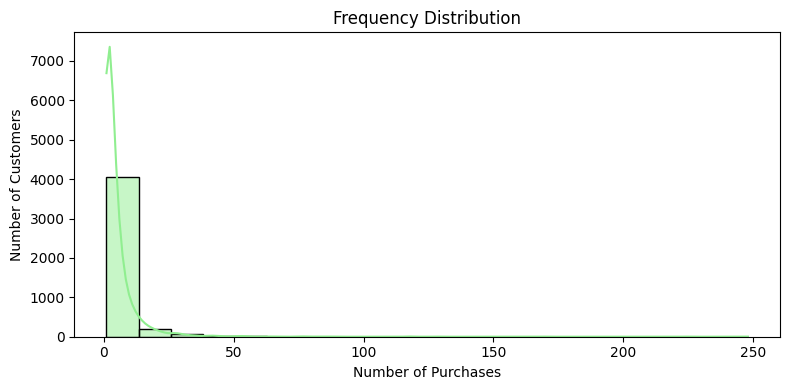

In [29]:
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Frequency'], bins=20, kde=True, color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'frequency_distribution.png'))
plt.show()


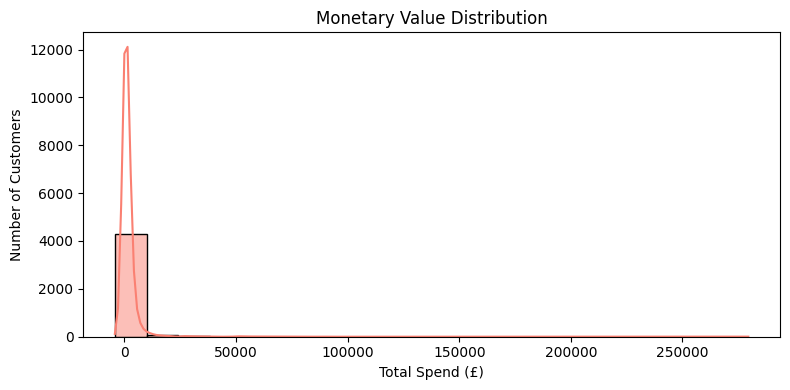

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(rfm['MonetaryValue'], bins=20, kde=True, color='salmon')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Spend (£)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'monetary_value_distribution.png'))
plt.show()


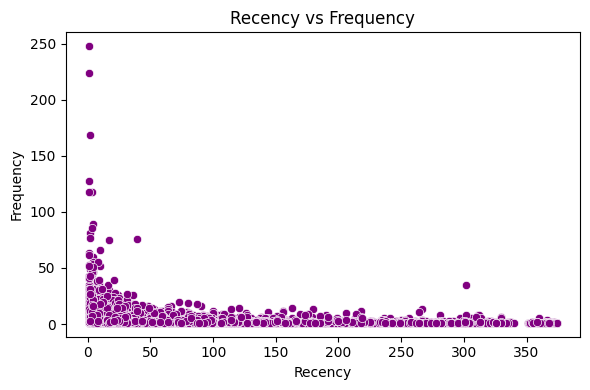

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', color='purple')
plt.title('Recency vs Frequency')
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'recency_vs_frequency.png'))
plt.show()


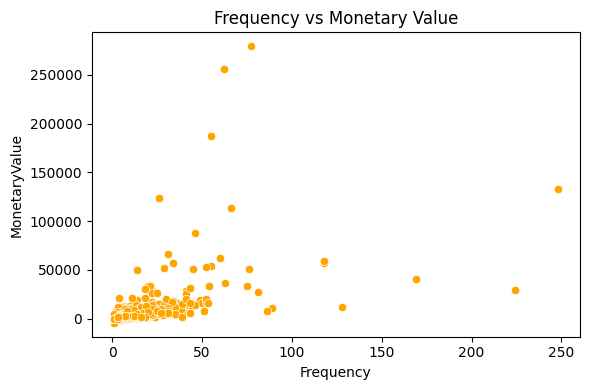

In [32]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=rfm, x='Frequency', y='MonetaryValue', color='orange')
plt.title('Frequency vs Monetary Value')
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'frequency_vs_monetary.png'))
plt.show()
